## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_info = pd.merge(mouse_metadata, study_results, how='inner', on=['Mouse ID'])


# Display the data table for preview
mouse_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice
print(f"Total # of rows of mouse data is {len(mouse_info['Mouse ID'])}.")
print(f"There are  {len(mouse_info['Mouse ID'].unique())} mice in the study.")

Total # of rows of mouse data is 1893.
There are  249 mice in the study.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_info[mouse_info.duplicated()]

duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
print(mouse_info.loc[mouse_info["Mouse ID"] == "g989"])



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_info.drop(mouse_info[mouse_info["Mouse ID"]=="g989"].index, inplace = True)


In [38]:
# Checking the number of mice in the clean DataFrame.
print(f"Total # of rows of mouse data is {len(mouse_info['Mouse ID'])}.")
print(f"There are  {len(mouse_info['Mouse ID'].unique())} mice in the study.")

Total # of rows of mouse data is 1880.
There are  248 mice in the study.


## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_df = mouse_info.groupby(["Drug Regimen"])
tumor_info = {}
#tumor_info["Drug Regimen"] = regimen_df["Drug Regimen"]
tumor_info["Mean"] = regimen_df["Tumor Volume (mm3)"].mean()
tumor_info["Median"]=regimen_df["Tumor Volume (mm3)"].median()
tumor_info["Variance"]=regimen_df["Tumor Volume (mm3)"].var()
tumor_info["Standard Deviation"]=regimen_df["Tumor Volume (mm3)"].std()
tumor_info["SEM"]=regimen_df["Tumor Volume (mm3)"].sem()
tumor_df=pd.DataFrame(tumor_info)
tumor_df      



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

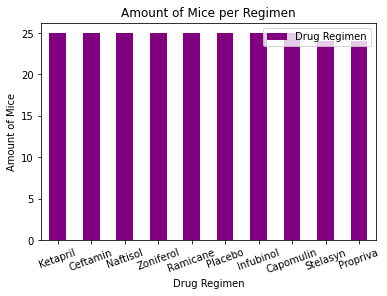

In [133]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_counts = mouse_info[["Mouse ID", "Drug Regimen"]]
clean_mouse = mouse_counts.drop_duplicates()
regimen_amount = clean_mouse["Drug Regimen"].value_counts()
regimen_df = pd.DataFrame(regimen_amount)
regimen_df

regimen_df.plot(kind="bar", color="purple")
plt.title("Amount of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount of Mice")
plt.xticks(rotation=20)

Text(0, 0.5, 'Amount of Mice')

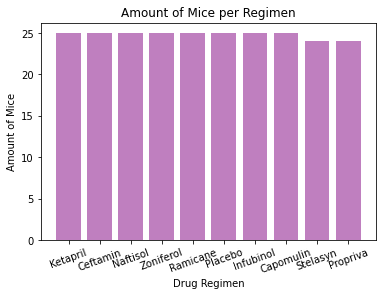

In [131]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis=regimen_df.index
y_axis=regimen_df["Drug Regimen"]

#x_axis= (regimen_df["Drug Regimen"].max()+5)
plt.bar(x_axis,y_axis, color="purple", alpha=0.5, align="center")
plt.xticks(rotation=20)
plt.title("Amount of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount of Mice")


        Sex
Male    125
Female  123


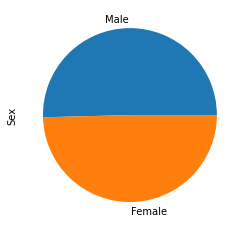

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_start = mouse_info[["Mouse ID", "Sex"]]
gender_unique = gender_start.drop_duplicates()
gender_count = gender_unique["Sex"].value_counts()
gender_df = pd.DataFrame(gender_count)
print(gender_df)
gender_count.plot(kind="pie")


([<matplotlib.patches.Wedge at 0x26b668af1d0>,
 [Text(-0.696335501700647, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.3798193645639892, -0.46447524186140154, '50.4&&'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6&&')])

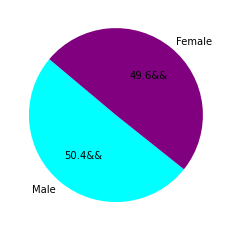

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
sizes = gender_df["Sex"]
colors=["cyan","purple"]
explode=(0,0)
plt.pie(sizes,explode=explode,labels=labels, colors=colors, autopct="%1.1f&&", shadow=False, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
